In [46]:
%matplotlib notebook
import pymc3 as pm
import numpy as np
from matplotlib import animation, rc
from IPython.display import HTML

import matplotlib.pyplot as plt

Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Thomas Wiecki'), bitrate=1800)

#rc('animation', html='jshtml')
#rc('animation', embed_limit=100)

In [47]:
# Generate some data
np.random.seed(124)
size = 50
true_intercept = 1
true_slope = 2

x = np.linspace(0, 1, size)
y = true_intercept + x*true_slope + np.random.normal(scale=.5, size=size)

data = dict(x=x, y=y)

<IPython.core.display.Javascript object>


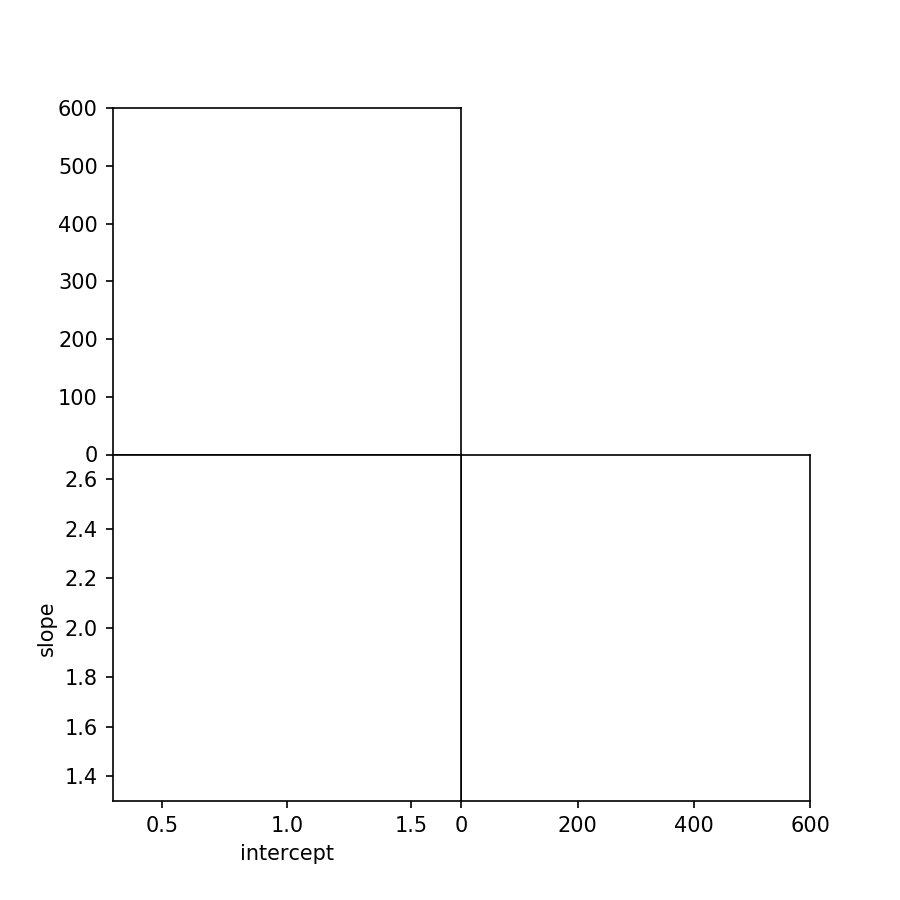

In [57]:
# Quickly hacked plotting code
samples = 600

fig = plt.figure(figsize=(6, 6))
i_width = (true_intercept-.7, true_intercept+.7)
s_width = (true_slope-.7, true_slope+.7)
samples_width = (0, samples)
ax1 = fig.add_subplot(221, xlim=i_width, ylim=samples_width)
ax2 = fig.add_subplot(224, xlim=samples_width, ylim=s_width)
ax3 = fig.add_subplot(223, xlim=i_width, ylim=s_width,
                      xlabel='intercept',
                      ylabel='slope')
fig.subplots_adjust(wspace=0.0, hspace=0.0)
line1, = ax1.plot([], [], lw=1)
line2, = ax2.plot([], [], lw=1)
line3, = ax3.plot([], [], 'o', lw=2, alpha=.1)
line4, = ax3.plot([], [], lw=1, alpha=.3)
line5, = ax3.plot([], [], 'k', lw=1)
line6, = ax3.plot([], [], 'k', lw=1)
ax1.set_xticklabels([])
ax2.set_yticklabels([])
#path = plt.scatter([], [])
lines = [line1, line2, line3, line4, line5, line6]

def init():
    for line in lines:
        line.set_data([], [])
    return lines

def animate(i):
    if i >= 200:
        i += 300
    trace = trace_df.iloc[:i+1]
    line1.set_data(trace['Intercept'][::-1], range(len(trace['Intercept'])))
    line2.set_data(range(len(trace['x'])), trace['x'][::-1])
    line3.set_data(trace['Intercept'], trace['x'])
    line4.set_data(trace['Intercept'], trace['x'])
    intercept = trace['Intercept'].iloc[-1]
    x = trace['x'].iloc[-1]
    line5.set_data([intercept, intercept], [x, s_width[1]])
    line6.set_data([intercept, i_width[1]], [x, x])
    return lines

In [58]:
with pm.Model() as model:
    pm.glm.GLM.from_formula('y ~ x', data)
    step = pm.Metropolis()
    trace = pm.sample(samples+1000, step, chains=1)
    trace_df = pm.trace_to_dataframe(trace)
    
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=samples, interval=5, blit=True)

anim.save('metropolis.mp4', writer=writer)
#HTML(anim.to_jshtml())

Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [sd]
>Metropolis: [x]
>Metropolis: [Intercept]
100%|██████████| 2100/2100 [00:00<00:00, 2252.10it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks


In [59]:
with pm.Model() as model:
    pm.glm.GLM.from_formula('y ~ x', data)
    step = pm.Slice()
    trace = pm.sample(samples+1000, step, chains=1)
    trace_df = pm.trace_to_dataframe(trace)
    
anim = animation.FuncAnimation(fig, animate, init_func=init,
                        frames=samples, interval=5, blit=True)

anim.save('slice.mp4', writer=writer)
#HTML(anim.to_jshtml())

Sequential sampling (1 chains in 1 job)
CompoundStep
>Slice: [sd]
>Slice: [x]
>Slice: [Intercept]
100%|██████████| 2100/2100 [00:02<00:00, 730.02it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks


In [60]:
with pm.Model() as model:
    pm.glm.GLM.from_formula('y ~ x', data)
    step = pm.NUTS()
    trace = pm.sample(samples+1000, step, chains=1)
    trace_df = pm.trace_to_dataframe(trace)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                                frames=samples, interval=5, blit=True)

anim.save('nuts.mp4', writer=writer)
#HTML(anim.to_jshtml())

Sequential sampling (1 chains in 1 job)
NUTS: [sd, x, Intercept]
100%|██████████| 2100/2100 [00:03<00:00, 639.60it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
